In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
ROOT_PATH='/content/drive/My Drive/Colab Notebooks/learning_ai'
sys.path.append(ROOT_PATH)

Mounted at /content/drive


In [ ]:
!pip install dlt

In [ ]:
from common import config
# config.GPU=True
from common.np import *
from model.auto_encoder import AutoEncoder
from common.optimizer import *
from common.trainer import Trainer
import dlt
from common.util import to_cpu,to_gpu

data = dlt.cifar.load_cifar10()
x_train=data.train_images
x_test=data.test_images
t_train=data.train_labels
t_test=data.test_labels

x_train=x_train.transpose(0,3,1,2).astype('f')
x_test=x_test.transpose(0,3,1,2).astype('f')
t_train=t_train.reshape(t_train.shape[0])
t_test=t_test.reshape(t_test.shape[0])

if GPU:
    x_train=to_gpu(x_train)
    x_test=to_gpu(x_test)
    t_train=to_gpu(t_train)
    t_test=to_gpu(t_test)

x_train/=255.
x_test/=255.

input_shape=(3,32,32)

enc_layer_list=[['conv',[64,3,3,1,1,2]], ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[64,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['conv',[256,3,3,1,1,2]], ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],
            ['gap',[]],['affine',[2,1]],['batchnorm',[0.9,None,None]],['sigmoid',[]]]

dec_layer_list=[['affine',[256,2]],['relu',[]],['repeat',[8,8]],
                ['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['deconv',[64,2,2,1,1,2],],['relu',[]],
                ['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['deconv',[64,2,2,1,1,2],],['relu',[]],
                ['conv',[64,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[64,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['conv',[3,3,3,1,1,2]],['relu',[]]
                ]
loss_layer='mse'

lr=0.001

max_epoch=20
batch_size=100
clip_grads=None
eval_interval=500
eval_accuracy=False
show_distribution=False
file_name=ROOT_PATH+'/pkl/AE_cifar10'

args_model=(input_shape,enc_layer_list,dec_layer_list,loss_layer,show_distribution)
args_trainer=(x_train,x_train,max_epoch,batch_size,clip_grads,eval_interval,eval_accuracy,x_test,t_test,file_name)

model=AutoEncoder(*args_model)
for layer in model.layers:
    print(layer.__class__.__name__,layer.output_shape)

optimizer=Adam(lr)
trainer=Trainer(model,optimizer)

trainer.fit(*args_trainer)

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------

170500096/170498071 [==============================] - 2s 0us/step
Convolution (64, 32, 32)
BatchNormalization (64, 32, 32)
Relu (64, 32, 32)
Convolution (64, 32, 32)
BatchNormalization (64, 32, 32)
Relu (64, 32, 32)
Pooling (64, 16, 16)
Convolution (128, 16, 16)
BatchNormalization (128, 16, 16)
Relu (128, 16, 16)
Convolution (128, 16, 16)
BatchNormalization (128, 16, 16)
Relu (128, 16, 16)
Pooling (128, 8, 8)
Convolution (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
Convolution (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
GAP (256,)
Affine (2,)
BatchNormalization (2,)
Sigmoid (2,)
Affine (256,)
Relu (256,)
Repeat (256, 8, 8)
Convolution (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
Convolution (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
Deconvolution (64, 16, 16)
Relu

In [ ]:
from common import config
# config.GPU=True
from common.np import *
from model.auto_encoder import AutoEncoder
from common.optimizer import *
from common.trainer import Trainer
import dlt
from common.util import to_cpu,to_gpu

data = dlt.cifar.load_cifar10()
x_train=data.train_images
x_test=data.test_images
t_train=data.train_labels
t_test=data.test_labels

x_train=x_train.transpose(0,3,1,2).astype('f')
x_test=x_test.transpose(0,3,1,2).astype('f')
t_train=t_train.reshape(t_train.shape[0])
t_test=t_test.reshape(t_test.shape[0])

if GPU:
    x_train=to_gpu(x_train)
    x_test=to_gpu(x_test)
    t_train=to_gpu(t_train)
    t_test=to_gpu(t_test)

x_train/=255.
x_test/=255.

input_shape=(3,32,32)

enc_layer_list=[['conv',[64,3,3,1,1,2]], ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[64,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['conv',[256,3,3,1,1,2]], ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],
            ['gap',[]],['affine',[2,1]],['batchnorm',[0.9,None,None]],['sigmoid',[]]]

dec_layer_list=[['affine',[256,2]],['relu',[]],['repeat',[8,8]],
                ['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['deconv',[64,2,2,1,1,2],],['relu',[]],
                ['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['deconv',[64,2,2,1,1,2],],['relu',[]],
                ['conv',[64,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[64,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['conv',[3,3,3,1,1,2]],['relu',[]]
                ]
loss_layer='mse'

lr=0.001

max_epoch=20
batch_size=100
clip_grads=None
eval_interval=500
eval_accuracy=False
show_distribution=False
file_name=ROOT_PATH+'/pkl/AE_cifar10'

args_model=(input_shape,enc_layer_list,dec_layer_list,loss_layer,show_distribution)
args_trainer=(x_train,x_train,max_epoch,batch_size,clip_grads,eval_interval,eval_accuracy,x_test,t_test,file_name)

model=AutoEncoder(*args_model)
for layer in model.layers:
    print(layer.__class__.__name__,layer.output_shape)

model.load_params(ROOT_PATH+'/pkl/AE_cifar10_58.07594749483347.pkl')

170500096/170498071 [==============================] - 2s 0us/step
Convolution (64, 32, 32)
BatchNormalization (64, 32, 32)
Relu (64, 32, 32)
Convolution (64, 32, 32)
BatchNormalization (64, 32, 32)
Relu (64, 32, 32)
Pooling (64, 16, 16)
Convolution (128, 16, 16)
BatchNormalization (128, 16, 16)
Relu (128, 16, 16)
Convolution (128, 16, 16)
BatchNormalization (128, 16, 16)
Relu (128, 16, 16)
Pooling (128, 8, 8)
Convolution (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
Convolution (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
GAP (256,)
Affine (2,)
BatchNormalization (2,)
Sigmoid (2,)
Affine (256,)
Relu (256,)
Repeat (256, 8, 8)
Convolution (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
Convolution (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
Deconvolution (64, 16, 16)
Relu (64, 16, 16)
Convolution (128, 16, 16)
BatchNormalization (128, 16, 16)
Relu (128, 16, 16)
Convolution (128, 16, 16)
BatchNormalization (128, 16, 16)
Relu (128, 

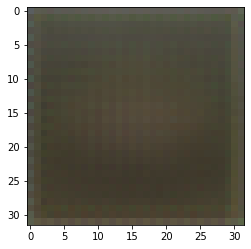

In [ ]:
import matplotlib.pyplot as plt

x=np.array([[0.9,0.9]])
y=model.generate(x,(3,32,32))
plt.imshow(y)

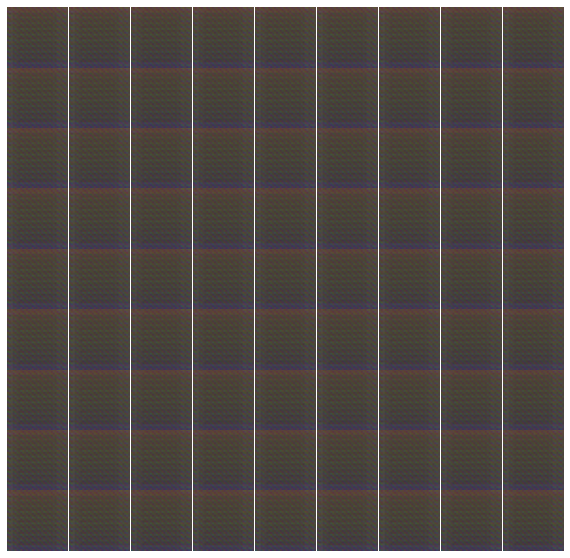

In [ ]:
model.show_generate(0.1,1.0,0.1,(3,32,32))

In [ ]:
from common import config
# config.GPU=True
from common.np import *
from model.auto_encoder import AutoEncoder
from common.optimizer import *
from common.trainer import Trainer
import dlt
from common.util import to_cpu,to_gpu

data = dlt.cifar.load_cifar10()
x_train=data.train_images
x_test=data.test_images
t_train=data.train_labels
t_test=data.test_labels

x_train=x_train.transpose(0,3,1,2).astype('f')
x_test=x_test.transpose(0,3,1,2).astype('f')
t_train=t_train.reshape(t_train.shape[0])
t_test=t_test.reshape(t_test.shape[0])

if GPU:
    x_train=to_gpu(x_train)
    x_test=to_gpu(x_test)
    t_train=to_gpu(t_train)
    t_test=to_gpu(t_test)

x_train/=255.
x_test/=255.

input_shape=(3,32,32)

enc_layer_list=[['conv',[64,3,3,1,1,2]],['relu',[]],['conv',[64,3,3,1,1,2]],['relu',[]],['pool',[2,2,0,2]],
            ['conv',[128,3,3,1,1,2]],['relu',[]],['conv',[128,3,3,1,1,2]],['relu',[]],['pool',[2,2,0,2]],
            ['conv',[256,3,3,1,1,2]],['relu',[]],['conv',[256,3,3,1,1,2]],['relu',[]],
            ['gap',[]],['affine',[2,1]],['sigmoid',[]]]

dec_layer_list=[['affine',[256,2]],['relu',[]],['repeat',[8,8]],
                ['conv',[256,3,3,1,1,2]],['relu',[]],['conv',[256,3,3,1,1,2]],['relu',[]],['deconv',[64,2,2,1,1,2],],['relu',[]],
                ['conv',[128,3,3,1,1,2]],['relu',[]],['conv',[128,3,3,1,1,2]],['relu',[]],['deconv',[64,2,2,1,1,2],],['relu',[]],
                ['conv',[64,3,3,1,1,2]],['relu',[]],['conv',[64,3,3,1,1,2]],['relu',[]],['conv',[3,3,3,1,1,2]],['relu',[]]
                ]
loss_layer='mse'

lr=0.001

max_epoch=20
batch_size=100
clip_grads=None
eval_interval=500
eval_accuracy=False
show_distribution=False
file_name=ROOT_PATH+'/pkl/AE_cifar10'

args_model=(input_shape,enc_layer_list,dec_layer_list,loss_layer,show_distribution)
args_trainer=(x_train,x_train,max_epoch,batch_size,clip_grads,eval_interval,eval_accuracy,x_test,t_test,file_name)

model=AutoEncoder(*args_model)
for layer in model.layers:
    print(layer.__class__.__name__,layer.output_shape)

# optimizer=Adam(lr)
# trainer=Trainer(model,optimizer)

# trainer.fit(*args_trainer)

Convolution (64, 32, 32)
Relu (64, 32, 32)
Convolution (64, 32, 32)
Relu (64, 32, 32)
Pooling (64, 16, 16)
Convolution (128, 16, 16)
Relu (128, 16, 16)
Convolution (128, 16, 16)
Relu (128, 16, 16)
Pooling (128, 8, 8)
Convolution (256, 8, 8)
Relu (256, 8, 8)
Convolution (256, 8, 8)
Relu (256, 8, 8)
GAP (256,)
Affine (2,)
Sigmoid (2,)
Affine (256,)
Relu (256,)
Repeat (256, 8, 8)
Convolution (256, 8, 8)
Relu (256, 8, 8)
Convolution (256, 8, 8)
Relu (256, 8, 8)
Deconvolution (64, 16, 16)
Relu (64, 16, 16)
Convolution (128, 16, 16)
Relu (128, 16, 16)
Convolution (128, 16, 16)
Relu (128, 16, 16)
Deconvolution (64, 32, 32)
Relu (64, 32, 32)
Convolution (64, 32, 32)
Relu (64, 32, 32)
Convolution (64, 32, 32)
Relu (64, 32, 32)
Convolution (3, 32, 32)
Relu (3, 32, 32)
